<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/TensorFlow/AI_Crowd_Research_paper_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install aicrowd-cli
API_KEY = '' 
!aicrowd login --api-key $API_KEY

# Downloading the Dataset
# Downloading the Dataset ( removing data and assets folder if existing already and then creating the folder )
!rm -rf data
!mkdir data
!rm -rf assets
!mkdir assets

!aicrowd dataset download --challenge research-paper-classification -j 3 -o data # Downloading the dataset and saving it in data folder

     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 174kB 36.3MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 215kB 36.0MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
API Key valid
Saved API Key successfully!

test.csv:   0% 0.00/3.01M [00:00<?, ?B/s]
val.csv:

In [ ]:
# Importing all the packages we need 
import tensorflow as tf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing the data 

train_data = pd.read_csv('data/train.csv')
val_data = pd.read_csv('data/val.csv')
test_data = pd.read_csv('data/test.csv')

# Printing out all shapes of our data 
print(f'Shape of the train data: {train_data.shape}')
print(f'Shape of the validation data: {val_data.shape}')
print(f'Shape of the test data: {test_data.shape}')

Shape of the train data: (31500, 3)
Shape of the validation data: (2700, 3)
Shape of the test data: (10800, 3)


In [ ]:
train_data.head()

,id,text,label
0,0,we propose deep network models and learning al...,3
1,1,multi-distance information computed by the MDL...,3
2,2,traditional solutions consider dense pedestria...,2
3,3,"in this paper, is used the lagrangian classica...",2
4,4,the aim of this work is to determine how vulne...,3


In [ ]:
# How many labels are there? 
train_data['label'].value_counts()

3    19676
0     4352
1     4078
2     3394
Name: label, dtype: int64

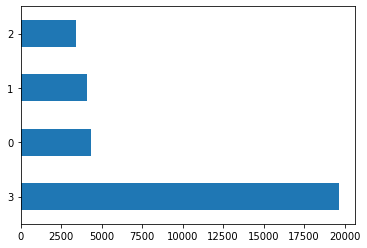

In [ ]:
# Plotting the above same stuff 
train_data['label'].value_counts().plot(kind = 'barh')

In [ ]:
# Shuffling our train data 
train_data_shuffled = train_data.sample(frac = 1 , random_state = 42)
train_data_shuffled.head() , train_data_shuffled.shape

(          id                                               text  label
 14664  14664  DefGrid is a learnable neural network module t...      3
 1981    1981  combining Haar-Hilbert and Log-Gabor improves ...      3
 18349  18349  the simulator, based on ROS (Robot Operating S...      2
 20489  20489  we propose a method to synthesize policies tha...      0
 18121  18121  previous flow completion methods are often una...      3,
 (31500, 3))

In [ ]:
# Splitting sentences and labels
train_sentences = train_data_shuffled['text'].to_numpy()
train_labels = train_data_shuffled['label'].to_numpy()

val_sentences = val_data['text'].to_numpy()
val_labels = val_data['label'].to_numpy()

test_sentences = test_data['text'].to_numpy()
test_labels = test_data['label'].to_numpy()


# Checking the shapes 
print(f'Shape of the train sentences: {train_sentences.shape}')
print(f'Shape of the validation sentences: {val_sentences.shape}')
print(f'Shape of the train labels: {train_labels.shape}')
print(f'Shape of the validation labels: {val_labels.shape}')

Shape of the train sentences: (31500,)
Shape of the validation sentences: (2700,)
Shape of the train labels: (31500,)
Shape of the validation labels: (2700,)


In [ ]:
# Converting into dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences , train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((val_sentences , val_labels))


In [ ]:
train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
# Enabling prefetch and turning our data into batches.

train_dataset = train_dataset.shuffle(buffer_size= 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size = 32).prefetch(tf.data.AUTOTUNE)


In [ ]:
train_dataset , val_dataset

(<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>,
 <PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>)

In [ ]:
for text , label in train_dataset.take(1):
  print(f'Label: {label[0]}')
  print(f'\nText:\n {text[0]}')

Label: 2

Text:
 b'the method paves the way for deducting high-level reactive behaviors from low-level perceptive information by autonomous robots . the aforementioned process lets us actualize different generations of Braitenberg vehicles .'


In [ ]:
# Setting up our text vectorization variable 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
max_vocab_length = 15000 
max_length = 18

# Creating a instance 
text_vectorizer = TextVectorization(max_tokens = max_vocab_length ,
                                    output_mode = 'int' , 
                                    output_sequence_length = max_length)


In [ ]:
# Fit the text vectorizer to the training sentence
text_vectorizer.adapt(train_sentences)

In [ ]:
# Creating a embedding layer 
from tensorflow.keras import layers 

embedding = layers.Embedding(input_dim = max_vocab_length , 
                             output_dim = 128 , 
                             input_length = max_length)

embedding

In [ ]:
train_dataset.element_spec

(TensorSpec(shape=(None,), dtype=tf.string, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

In [71]:
# Building an LSTM Model 
from tensorflow.keras import layers 

# Setting up the inputs 
inputs = layers.Input(shape = (1,), dtype = tf.string)

# Converting text into numbers and creating a embedding 
x = text_vectorizer(inputs)
x = embedding(x)

# The LSTM model 
#x = layers.Bidirectional(layers.LSTM(64 , return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
#x = layers.LSTM(32 , return_sequences= True)(x)
#x = layers.LSTM(8)(x)
x = layers.Dense(10 , activation = 'relu')(x)

# Intializing our outputs 
outputs = layers.Dense(4 , activation= 'softmax')(x)

# Packing into a model 
lstm_model = tf.keras.Model(inputs , outputs , name = 'LSTM_model')

# Summary of the model 
lstm_model.summary()

Model: "LSTM_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 18)                0         
_________________________________________________________________
embedding (Embedding)        (None, 18, 128)           1920000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 44        
Total params: 2,020,150
Trainable params: 2,020,150
Non-trainable params: 0
______________________________________________

In [72]:
# Compiling the model 
lstm_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
                   optimizer = tf.keras.optimizers.Adam() , 
                   metrics = ['accuracy'])

In [73]:
# Fitting the model 
lstm_history = lstm_model.fit(train_dataset , 
                              validation_data = val_dataset , 
                              epochs = 5)

Epoch 1/5
985/985 [==============================] - 44s 42ms/step - loss: 0.1457 - accuracy: 0.9501 - val_loss: 1.2463 - val_accuracy: 0.7356
Epoch 2/5
985/985 [==============================] - 40s 41ms/step - loss: 0.0437 - accuracy: 0.9857 - val_loss: 1.5440 - val_accuracy: 0.7430
Epoch 3/5
985/985 [==============================] - 40s 41ms/step - loss: 0.0323 - accuracy: 0.9888 - val_loss: 1.6713 - val_accuracy: 0.7126
Epoch 4/5
985/985 [==============================] - 40s 41ms/step - loss: 0.0294 - accuracy: 0.9896 - val_loss: 1.5848 - val_accuracy: 0.7211
Epoch 5/5
985/985 [==============================] - 40s 41ms/step - loss: 0.0222 - accuracy: 0.9920 - val_loss: 1.8471 - val_accuracy: 0.7304


In [74]:
lstm_pred_probs = lstm_model.predict(test_sentences)
lstm_preds = np.argmax(lstm_pred_probs , axis =1)
lstm_preds[:10]

array([3, 2, 3, 3, 1, 1, 1, 3, 3, 3])

In [75]:
# Dropping the label column
test_data.drop('label' , inplace = True , axis = 1)

# Assigning the predictions
test_data['label'] = lstm_preds
test_data.head()


,id,text,label
0,0,we propose a lightweight framework to detect i...,3
1,1,the proposed method presents an alternate solu...,2
2,2,proposed ear identification method fusing SIFT...,3
3,3,a method to reconstruct the three-dimensional ...,3
4,4,strong local consistencies can improve their p...,1


### Using Transfer Learning 

In [51]:
# Creating a Keras layer 
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4' , 
                                        input_shape = [] , # Defining a input shape so our layer will take anything sequence as a input (any variable length)
                                        dtype = tf.string , 
                                        trainable = False , 
                                        name = 'USE_layer')

In [52]:
# Building a model
from tensorflow.keras import layers

use_model = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64 , activation = 'relu'),
  layers.Dense(4 , activation = 'softmax')

] , name = 'USE_model')

# Summary of the mdoel 
use_model.summary()

Model: "USE_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE_layer (KerasLayer)       (None, 512)               256797824 
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
Total params: 256,830,916
Trainable params: 33,092
Non-trainable params: 256,797,824
_________________________________________________________________


In [53]:
# Compiling the model 
use_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
                  optimizer = tf.keras.optimizers.Adam() , 
                  metrics = ['accuracy'])

# Fitting the model 
use_history = use_model.fit(train_dataset , 
                            validation_data = val_dataset , 
                            epochs = 5)

Epoch 1/5
985/985 [==============================] - 15s 14ms/step - loss: 0.5945 - accuracy: 0.7766 - val_loss: 0.5126 - val_accuracy: 0.8174
Epoch 2/5
985/985 [==============================] - 13s 13ms/step - loss: 0.5099 - accuracy: 0.8079 - val_loss: 0.5053 - val_accuracy: 0.8141
Epoch 3/5
985/985 [==============================] - 13s 13ms/step - loss: 0.4971 - accuracy: 0.8112 - val_loss: 0.4985 - val_accuracy: 0.8196
Epoch 4/5
985/985 [==============================] - 13s 13ms/step - loss: 0.4864 - accuracy: 0.8151 - val_loss: 0.4892 - val_accuracy: 0.8263
Epoch 5/5
985/985 [==============================] - 13s 13ms/step - loss: 0.4756 - accuracy: 0.8201 - val_loss: 0.4839 - val_accuracy: 0.8248


In [55]:
use_pred_probs = use_model.predict(test_sentences)
use_preds = np.argmax(use_pred_probs , axis =1)
use_preds[:10]

array([3, 3, 3, 3, 0, 1, 3, 0, 3, 3])

In [57]:
# Dropping the label column
test_data.drop('label' , inplace = True , axis = 1)

# Assigning the predictions
test_data['label'] = use_preds
test_data.head()


,id,text,label
0,0,we propose a lightweight framework to detect i...,3
1,1,the proposed method presents an alternate solu...,3
2,2,proposed ear identification method fusing SIFT...,3
3,3,a method to reconstruct the three-dimensional ...,3
4,4,strong local consistencies can improve their p...,0


In [76]:
import os
#!mkdir assets
test_data.to_csv(os.path.join("assets", "submission.csv"), index=False)

In [77]:
!aicrowd notebook submit -c research-paper-classification -a assets --no-verify

Using notebook: /content/drive/MyDrive/Colab Notebooks/AI_Crowd_Research_paper_classification.ipynb for submission...
Removing existing files from submission directory...
Scrubbing API keys from the notebook...
submission.zip ━━━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 1.1/1.1 MB • 1.7 MB/s • 0:00:00
                                                        ╭─────────────────────────╮                                                        
                                                        │ Successfully submitted! │                                                        
                                                        ╰─────────────────────────╯                                                        
                                                              Important links                                                              
┌──────────────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This 